# Pengelompokan Komuter Berdasarkan Indikator Kepuasan Hidup dengan K-Means Clustering

**Author: [Rezky Yayang Yakhamid](https://linkr.bio/rezkyyayang)**

Repositori ini memuat syntax R (dalam bentuk markdown) beserta interpretasi dan analisis serta dilengkapi dengan dataset yang digunakan mengenai pengelompokan komputer berdasarkan kepuasan hidupnya dengan metode K-Means Clustering. Syntax tersebut diselesaikan pada Desember 2021 sebagai jawaban ujian akhir semester mata kuliah Data Mining, semester 7, Politeknik Statistika STIS. Semoga bermanfaat.

### Instalasi package/library
Sebelum menjalankan program, beberapa library R berikut harus diinstal. Jalankan syntax berikut untuk menginstall library yang diperlukan.

In [ ]:
install.packages(c("factoextra",
                    "clValid",
                    "corrplot",
                    "REdaS",
                    "psych"))

### Load library

In [ ]:
library(dplyr) #manipulate dataset
library(factoextra) #clustering
library(clValid) #validasi clustering
library(corrplot) #plot korelasi
library(REdaS) #bartlett spherical test, KMO (Kaiser-Meier-Olkin),
library(psych) #corr.test

## Pendahuluan
### Latar Belakang
Komuter adalah seseorang yang melakukan perjalanan ulang-alik dalam satu hari (pergi dan pulang) secara terus menerus yang biasanya oleh karena pekerjaan/sekolah/kursus di luar kabupaten/kota tempat tinggalnya. Berdasarkan survei komuter yang dilakukan oleh Badan Pusat Statistik (BPS) pada tahun 2019, setidaknya ada sekitar 3,2 juta komuter (11 persen) dari 29 juta penduduk wilayah aglomerasi Jabodetabek (BPS 2019). Menurut Vanderslice & Rice (1992) dalam (Rahmadana, M. F. 2014), komuter memiliki banyak kesulitan dalam hidupnya termasuk stres sebagai dampak kehilangan waktu dalam perjalanan serta selalu merasa pekerjaan yang terus menumpuk. Penelitian mengenai kualitas hidup komuter di Indonesia telah banyak dilakukan seperti penelitian dengan membandingkan kualitas hidup pekerja komuter dan bukan komuter (Cahyani, A. H., Akhyar, M., Niandhini, H., Alfira, S., Ananda, N., & Seulanga, N. 2018), membandingkan kualitas hidup komuter KRL dan Transjakarta (Kusmawan, D., & Susilowati, I. H. 2020), dan membandingkan kualitas hidup komuter berdasarkan karakteristik sosial demografi responden (Rahmadana, M. F. 2014).

### Tujuan Penelitian
Tujuan penelitian ini adalah melakukan pengelompokan terhadap komuter di Indonesia berdasarkan atribut-atribut yang menjadi indikator penyusun kualitas hidup responden

## Metodologi
### Metode Analisis
Metode analisis yang digunakan yakni K-Means Clustering, yakni metode yang digunakan untuk melakukan pengelompokan objek ke dalam k klaster. Setelah didapatkan k klaster, analisis dilanjutkan dengan melihat perbandingan antara klaster-klaster yang terbentuk berdasarkan karakteristik sosial demografi responden di dalam klaster tersebut melalui analisis deskriptif (visualisasi).

### Variabel Penelitian
Variabel yang digunakan dalam melakukan pengelompokan komuter dengan menggunakan metode K-Means Clustrering antara lain sebagai berikut:

<table class="table table-condensed">
<colgroup>
<col width="6%">
<col width="86%">
<col width="6%">
</colgroup>
<thead>
<tr class="header">
<th align="right">KODE</th>
<th align="left">DESKRIPSI VARIABEL</th>
<th align="right">SATUAN</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="right"></td>
<td align="left"><strong>Perumahan</strong></td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="right">B.1</td>
<td align="left">Keterjangkauan biaya perumahan</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">B.2</td>
<td align="left">Kelayakan rumah</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right"></td>
<td align="left"><strong>Rasio ketergantungan</strong></td>
<td align="right"></td>
</tr>
<tr class="odd">
<td align="right">C.4</td>
<td align="left">Rasio ketergantungan yakni rasio jumlah anggota keluarga yang tidak bekerja terhadap jumlah anggota keluarga yang bekerja</td>
<td align="right">Rasio</td>
</tr>
<tr class="even">
<td align="right"></td>
<td align="left"><strong>Pendapatan</strong></td>
<td align="right"></td>
</tr>
<tr class="odd">
<td align="right">D.1</td>
<td align="left">Pendapat: penghasilan sebagai komuter lebih besar</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right">D.2</td>
<td align="left">Pendapat: penghasilan sebagai komuter layak</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">D.3</td>
<td align="left">Kepatuhan jam kerja terhadap pendapatan</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right">D.4</td>
<td align="left">Pendapatan per bulan dalam rupiah (Rp/bulan)</td>
<td align="right">Rasio</td>
</tr>
<tr class="odd">
<td align="right"></td>
<td align="left"><strong>Keterjangkauan ke kota tujuan</strong></td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="right">E.1</td>
<td align="left">Kemudahan moda transportasi</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">E.2</td>
<td align="left">Kenyamanan perjalanan menuju tempat kerja</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right">E.3</td>
<td align="left">Keseimbangan waktu perjalanan ke tempat kerja</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right"></td>
<td align="left"><strong>Kualitas hidup</strong></td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="right">F.1</td>
<td align="left">Pendapat: hidup Anda jauh lebih baik jika bekerja bukan menjadi komuter</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">F.2</td>
<td align="left">Pendapat: Anda tidak punya cukup waktu untuk bersosialisasi dengan tetangga Anda</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right">F.3</td>
<td align="left">Pendapat: kualitas Anda sebagai orang tua terganggu karena Anda tidak memiliki cukup waktu untuk berinteraksi dengan anak-anak Anda</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">F.4</td>
<td align="left">Pendapat: Anda tidak punya waktu untuk memikirkan diri sendiri</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right">F.5</td>
<td align="left">Pendapat: kehidupan keluarga Anda terganggu karena Anda tidak memiliki cukup waktu untuk berinteraksi dengan pasangan Anda sehingga banyak hal yang tidak dapat dibicarakan dalam waktu yang terbatas</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">F.6</td>
<td align="left">Pendapat: secara keseluruhan, kepuasan hidup Anda sebagai komuter berkurang karena Anda tidak lagi memiliki banyak waktu untuk menyalurkan hobi dan aktivitas lain selain aktivitas rutin</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="even">
<td align="right">F.7</td>
<td align="left">Pendapat: Anda merasa memiliki individu stres dengan aktivitas sebagai komuter</td>
<td align="right">Ordinal (1-5)</td>
</tr>
<tr class="odd">
<td align="right">F.8</td>
<td align="left">Pendapat: meskipun pekerjaan Anda dalam batas yang wajar, tetapi waktu yang dialokasikan untuk bepergian sebagai komuter membuat Anda merasa terlalu banyak bekerja</td>
<td align="right">Ordinal (1-5)</td>
</tr>
</tbody>
</table>

Adapun variabel sosial-demografi responden yang akan digunakan untuk melihat perbandingan antar klaster antara lain: gender, usia, status perkawinan, pendidikan terakhir, agama, dan pekerjaan.


## Hasil dan Pembahasan
### Tahap Pre-processing Data
Sebelum melakukan pengelompokan objek dengan klastering, terlebih dahulu dilakukan preprocessing data yang bertujuan untuk mengatasi missing value, mengatasi outlier, mereduksi dimensi data, dan mengatasi multikolinearitas.

#### Import Dataset
Dataset: Kualitas Hidup Commuter Indonesia

In [2]:
komuter <- read.csv2("../input/kepuasanhidupkomuter/data_commuter.csv",sep=',')
#memperbaiki tipe data
komuter$C.4 <- as.double(komuter$C.4)
komuter$D.5 <- as.double(komuter$D.5)
komuter$Kepuasan.Hidup <- as.factor(komuter$Kepuasan.Hidup)

#### Observasi Dataset Komuter

In [ ]:
#melihat lima observasi awal
head(komuter)

#melihat nama dan tipe variabel
str(komuter)

#melihat ringkasan data
summary(komuter)

#### Deteksi Missing Value

In [3]:
#mengambil atribut yang menjadi dasar pengklasteran
komuter <- data.frame(komuter)
table(is.na(komuter[,-c(1:7,10:12,18,30)]))


FALSE 
 6912 

Tidak ada missing value, preprocessing dapat dilanjutkan dengan mengatasi outlier

#### Deteksi Outlier
Pendeteksian outlier dapat dilakukan dengan boxplot.

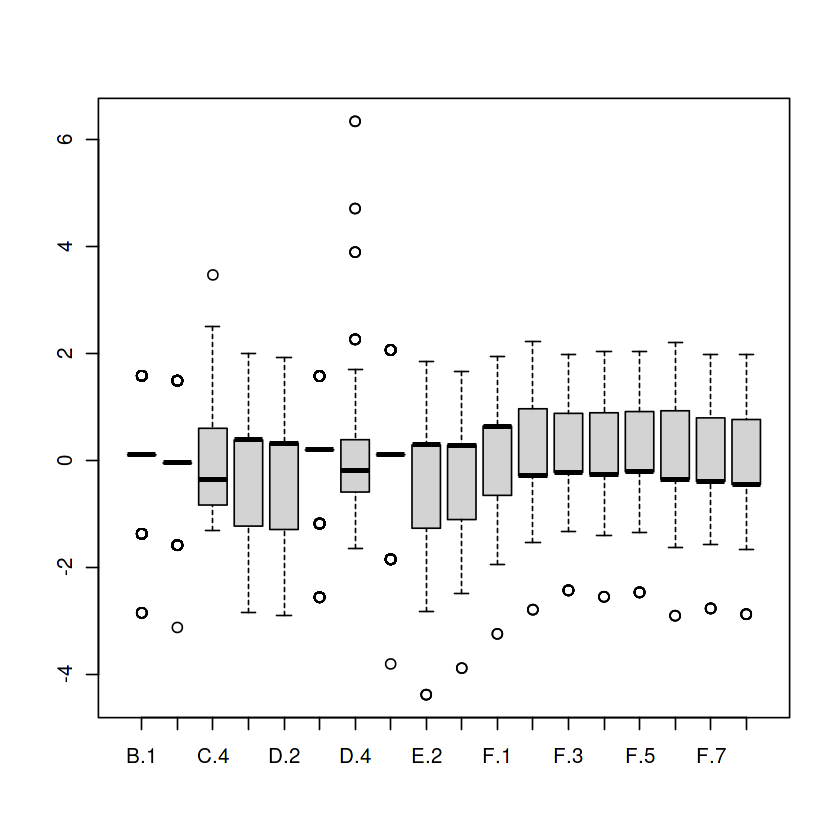

In [4]:
#mendeteksi outlier dengan boxplot
boxplot(scale(komuter[,-c(1:7,10:12,18,30)]))

Dari hasil visualisasi boxplot tersebut, terlihat bahwa terdapat outlier pada beberapa atribut. Outlier tersebut akan membuat proses clustering menjadi tidak efisien.

#### Mengatasi Outlier
Outlier tersebut diatasi dengan teknik winsorizing, yakni dengan cara mengubah nilai outlier menjadi nilai 95% batas ekor atas/bawah (1.5 ± IQR)

In [5]:
#mengatasi outlier dengan teknik winsorizing
for(i in c(8:9,13:17,19:29)){
qnt <- quantile(komuter[,i], probs=c(.25, .75), na.rm = T)
caps <- quantile(komuter[,i], probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(komuter[,i], na.rm = T)
komuter[,i][komuter[,i] < (qnt[1] - H)] <- caps[1]
komuter[,i][komuter[,i] > (qnt[2] + H)] <- caps[2]
}

#### Normalisasi/Scalling Data
Normalisasi dataset (scalling) digunakan untuk menyamakan skala atau satuan dari setiap atribut yang akan digunakan dalam analisis. Normalisasi dilakukan dengan cara transformasi z-score.

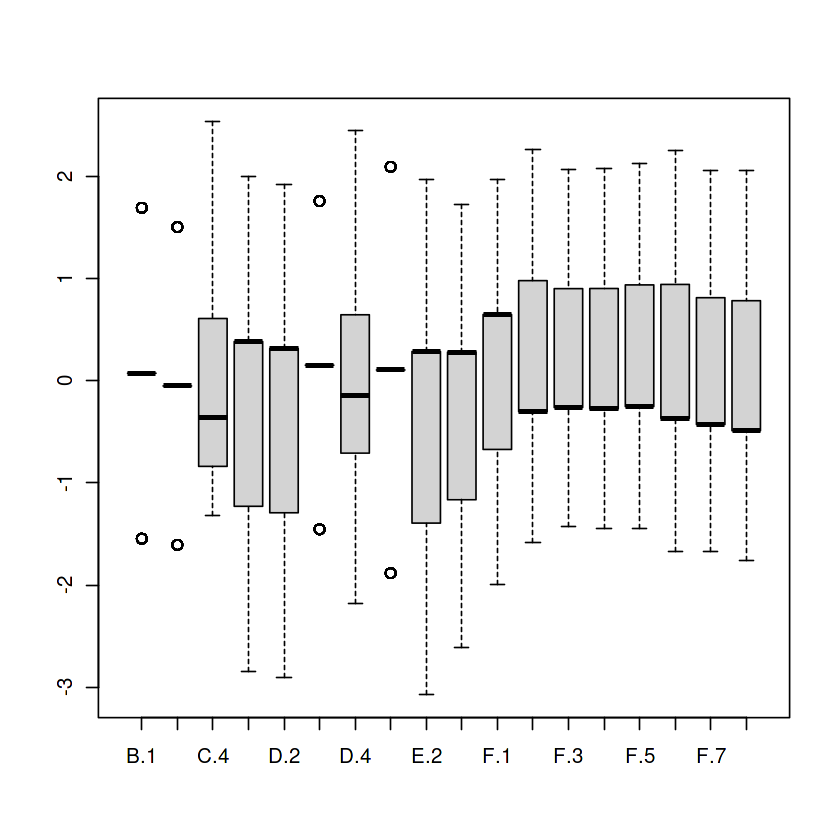

In [6]:
#normalisasi/scaling data yang sudah diatasi outliernya menggunakan  z score
komuter_scale <- data.frame(scale(komuter[,-c(1:7,10:12,18,30)]))
#box plot
boxplot(komuter_scale)

Hasil dari normalisasi tersebut dapat terlihat pada boxplot berikut di mana sudah dapat diperbandingkan karena memiliki skala yang sama. Setelah dilakukan manipulasi pada outlier melalui winsorizing, terlihat juga pada boxplot juga sudah tidak memiliki outlier yang berarti.

### Principal Component Analysis
Setelah memastikan data tidak mengandung missing value dan outlier, langkah selanjutnya adalah memastikan data tidak mengandung multikolinearitas atau korelasi antar atribut yang akan digunakan dalam clustering. Deteksi multikolinearitas dapat dilakukan dengan melihat plot korelasi antar atribut dan melakukan Uji Bartlett.

#### Plot korelasi

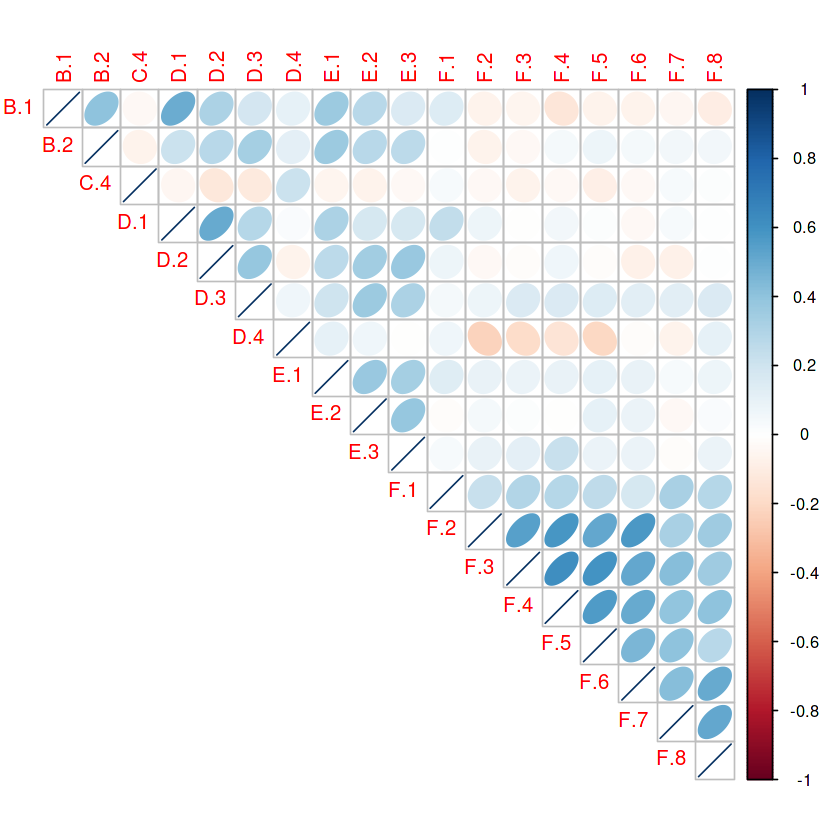

In [12]:
#plot korelasi (cek multikolinearitas)
corrplot(cor(komuter_scale),method="ellipse",type="upper")

Dari plot korelasi tersebut, terdapat indikasi adanya multikolinearitas yang menunjukkan adanya korelasi yang cukup kuat antar atribut.

#### Bartlett test of Spericity

Hipotesis:
H0 : Matriks korelasi sama dengan matriks identitas (tidak ada multikolinearitas)
H1 : Matriks korelasi tidak sama dengan matriks identitas

In [13]:
#bartlett test of sphericity
bart_spher(komuter_scale)

	Bartlett's Test of Sphericity

Call: bart_spher(x = komuter_scale)

     X2 = 2146.699
     df = 153
p-value < 2.22e-16

Statistik uji: 𝜒2 = 2146.699.

Dengan p-value < 2.22e-16, maka keputusannya tolak H0, artinya matriks korelasi bukan merupakan matriks identitas sehingga antar atribut cukup bukti untuk dinyatakan memiliki korelasi atau terjadi multikolinearitas. Data preprocessing dilanjutkan dengan reduksi variabel dan PCA untuk mengatasi multikolinearitas.

#####kaiser mayer olkin
KMO(komuter_scale) Kaiser Mayer Olkin

Sebelum menerapkan PCA, terlebih dahulu mereduksi atribut yang tidak memenuhi Kaiser Mayer Olkin (KMO). Atribut yang tidak memenuhi yakni atribut yang memiliki Measure of Sampling Adequacy (MSA) kurang dari 0.5 dapat direduksi (dibuang) dan tidak diikutkan dalam analisis lanjutan.

In [14]:
#kaiser mayer olkin
KMO(komuter_scale)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = komuter_scale)
Overall MSA =  0.81
MSA for each item = 
 B.1  B.2  C.4  D.1  D.2  D.3  D.4  E.1  E.2  E.3  F.1  F.2  F.3  F.4  F.5  F.6 
0.72 0.74 0.61 0.68 0.75 0.81 0.55 0.83 0.76 0.79 0.81 0.85 0.87 0.85 0.87 0.86 
 F.7  F.8 
0.83 0.80 

Sesuai hasil perhitungan dengan R, tidak ada nilai MSA yang kurang dari 0.5. Oleh karena itu, tidak ada atribut yang harus dikeluarkan serta setiap atribut dapat dilanjutkan pada PCA untuk mengatasi multikolinearitas yang terjadi.

#### Principal Component Analysis (PCA)

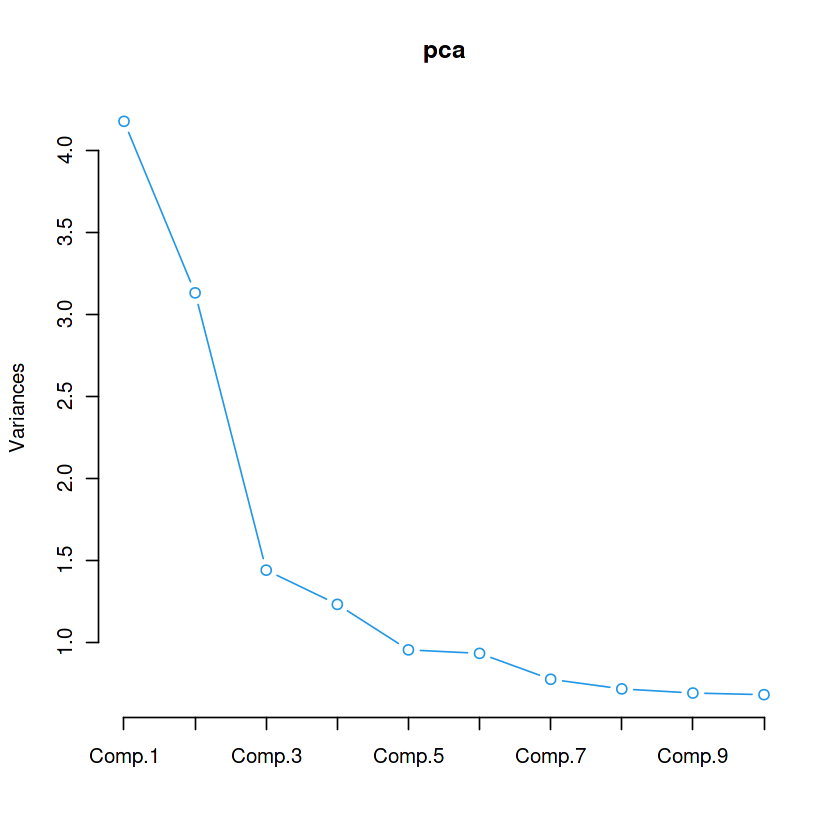

In [15]:
pca <- princomp(komuter_scale,cor=FALSE)
screeplot(pca,type="lines",col=4)

Hasil dari PCA ditampilkan dalam screeplot di samping. Pada scree plot tersebut, terlihat kurva mulai melandai pada komponen utama yang ketiga. Maka, akan digunakan tiga (3) komponen utama dalam analisis klaster dengan menggunakan metode K-Means. Ketiga komponen utama tersebut sudah dapat mewakili semua atribut yang digunakan dalam penelitian.

In [16]:
# Menyimpan nilai KU 1, KU 2, dan KU 3
komuter_pca <- pca$scores[,1:3]

In [17]:
set.seed(123)

### K-Means Clustering
Teknik unsupervised learning digunakan untuk melakukan proses pembelajaran pada data yang tidak memiliki informasi label dari objek yang akan diteliti. K-Means clustering adalah metode yang digunakan untuk melakukan pengelompokkan objek ke dalam sejumlah k klaster. Sebelum mengelompokkan observasi ke dalam klaster-klaster, terlebih dahulu ditentukan parameter berupa jumlah klaster (k) (Pramana, S., Yuniarto, B., Mariyah, S., Santoso, I., & Nooraeni, R 2020).

#### Penentuan Klaster (k)
Dengan melihat total within sum of square, silhouette, dan gap statistic

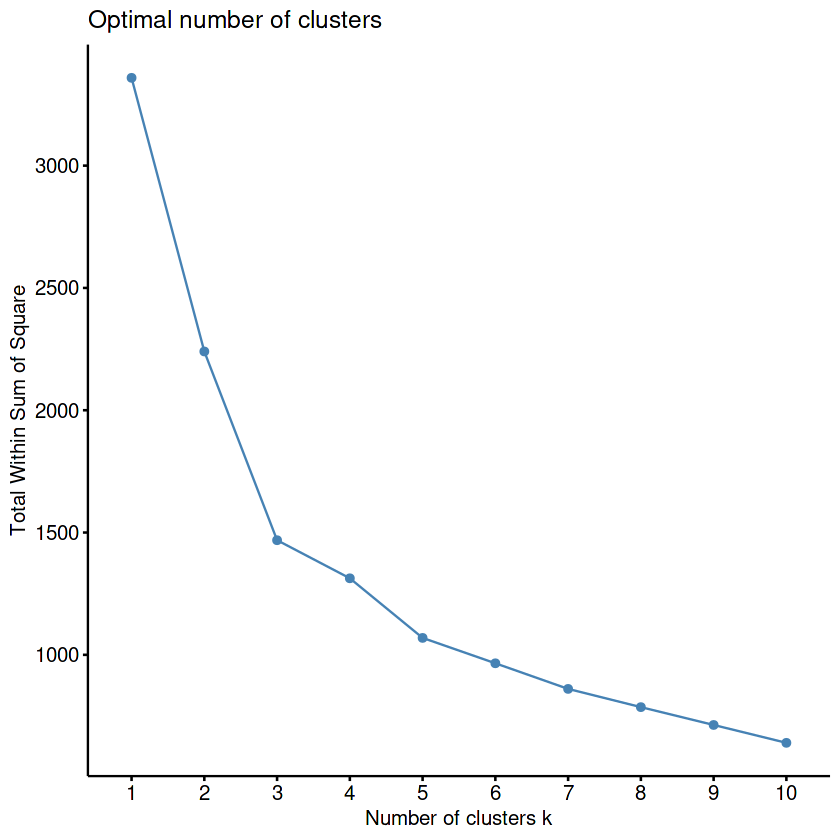

In [18]:
fviz_nbclust(komuter_pca,kmeans,method = "wss")

Dari total Within Sum of Square, kurva melandai ketika k=3, artinya jumlah klaster yang disarankan adalah sebanyak 3 klaster

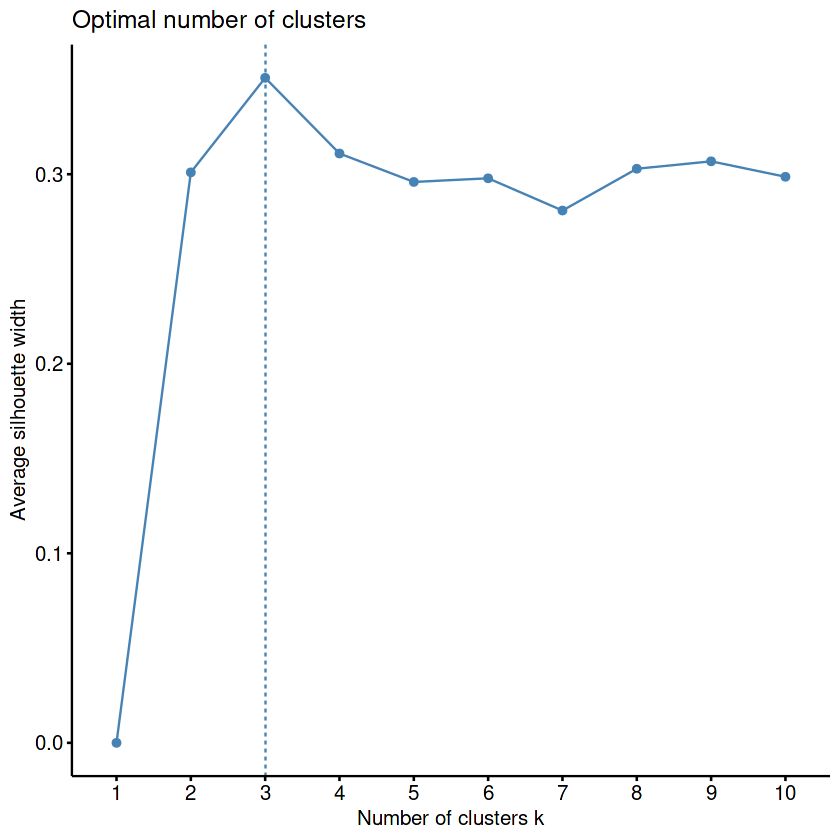

In [19]:
fviz_nbclust(komuter_pca,kmeans,method = "silhouette")

Dari rata-rata lebar silhouette, kurva mencapai titik maksimum ketika k=3, artinya jumlah klaster yang disarankan adalah sebanyak 3 klaster

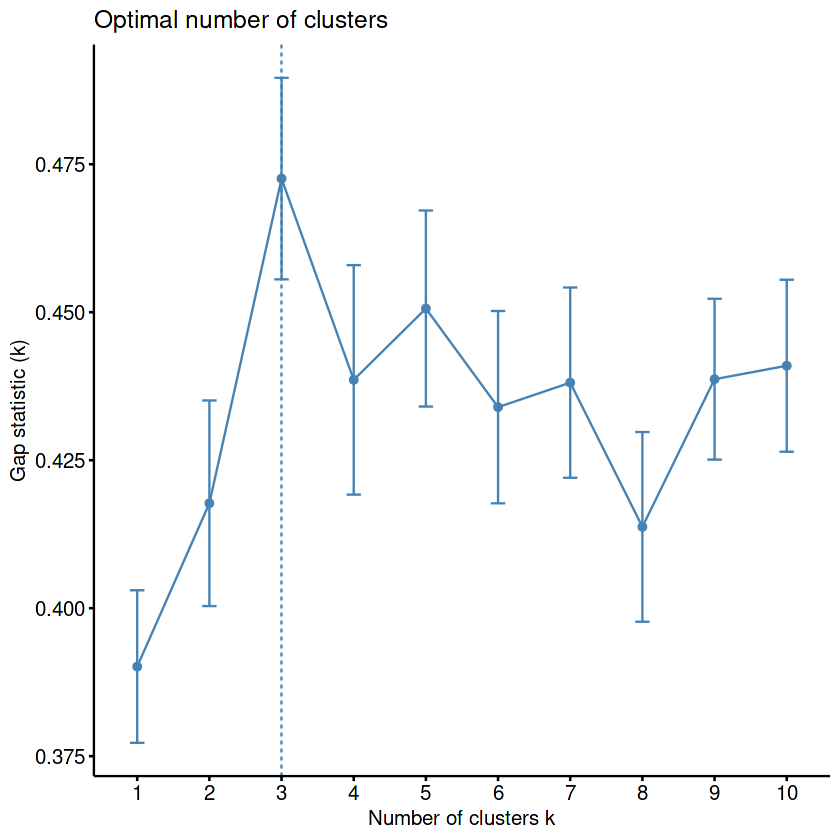

In [20]:
fviz_nbclust(komuter_pca,kmeans,method = "gap_stat")

Dari gap statistic, kurva mencapai titik maksimum ketika k=3, artinya jumlah klaster yang disarankan adalah sebanyak 3 klaster.

Berdasarkan total within sum of square, kurva mulai melandai pada k=3, artinya penambahan jumlah klaster tidak signifikan membawa pengaruh banyak atas penurunan variasi within cluster. Sementara itu, titik maksimum pada kriteria silhoute dan gap statistic juga menunjukkan pada saat k=3. Maka dari itu, peneliti menentukan jumlah klaster yang optimal sebanyak 3 klaster.

#### Validasi Klaster
Penentuan jumlah klaster optimum juga dapat dilakukan dengan menggunakan library clValid yang menghasilkan beberapa kriteria yakni Connectivity, Dunn, dan Silhoutte.

In [21]:
intern = clValid(komuter_pca,2:10,
                 clMethods = 'kmeans',
                 validation = 'internal')
summary(intern)

Warning message in clValid(komuter_pca, 2:10, clMethods = "kmeans", validation = "internal"):
“rownames for data not specified, using 1:nrow(data)”



Clustering Methods:
 kmeans 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                            2        3        4        5        6        7        8        9       10
                                                                                                     
kmeans Connectivity   34.6123  53.0421  76.8349 103.7790 109.6349 113.1679 140.2111 132.4500 156.3448
       Dunn            0.0288   0.0408   0.0502   0.0641   0.0669   0.0726   0.0597   0.0682   0.0763
       Silhouette      0.3010   0.3509   0.3130   0.2782   0.2987   0.3024   0.2884   0.3067   0.2946

Optimal Scores:

             Score   Method Clusters
Connectivity 34.6123 kmeans 2       
Dunn          0.0763 kmeans 10      
Silhouette    0.3509 kmeans 3       



Dari hasil validasi klaster tersebut, nilai connectivity menunjukkan angka paling kecil pada k=3, nilai dunn paling besar pada k=10, serta silhoutte menunjuukan angka paling besar pada k=3. Peneliti memutuskan untuk menggunakan nilai validasi dari silhoutte yang menunjukkan jumlah klaster yang harus dibentuk adalah sebanyak 3 klaster.

#### Pembentukan Model
Berdasarkan beberapa pertimbangan dalam penentuan jumlah klaster (k) sebelumnya, maka ditetapkan jumlah klaster ada sebanyak 3 klaster. Pemodelan dengan menggunakan K-Means clustering menghasilkan 3 klaster dengan banyak observasi pada masing-masing klaster sebagai berikut.

In [22]:
kmRes <- kmeans(komuter_pca,3)
table(kmRes$cluster)


  1   2   3 
123 136 125 

Hasil pengelompokan menunjukkan jumlah observasi yang hampir merata antara klaster 1, 2, dan 3. Klaster yang memiliki anggota paling banyak adalah klaster 2, sebanyak 136 unit.

#### Visualisasi Klaster

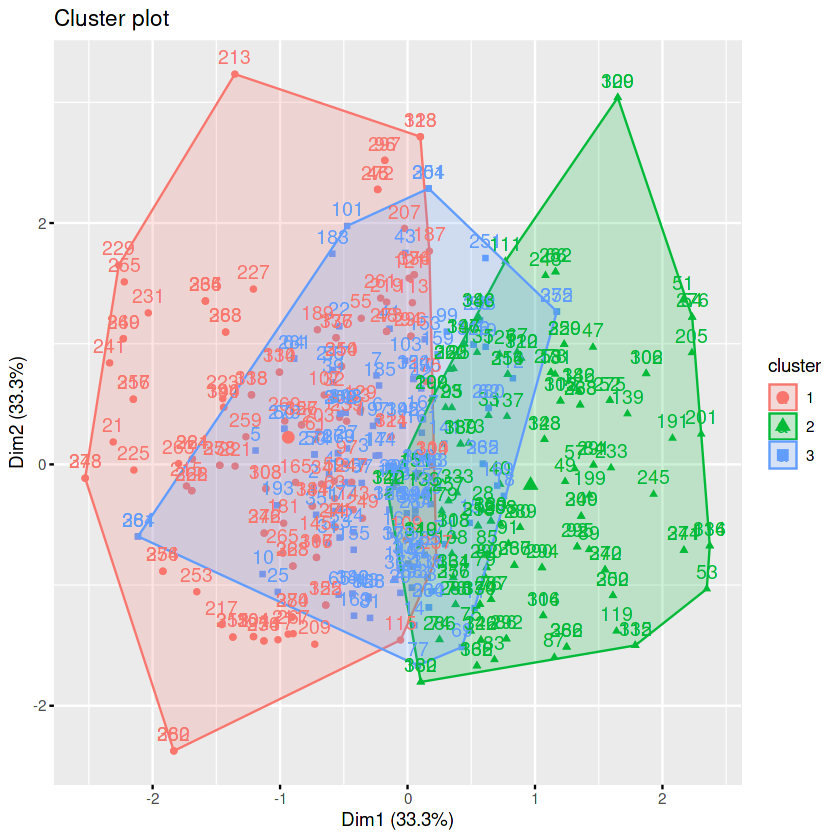

In [23]:
fviz_cluster(kmRes,komuter_pca)

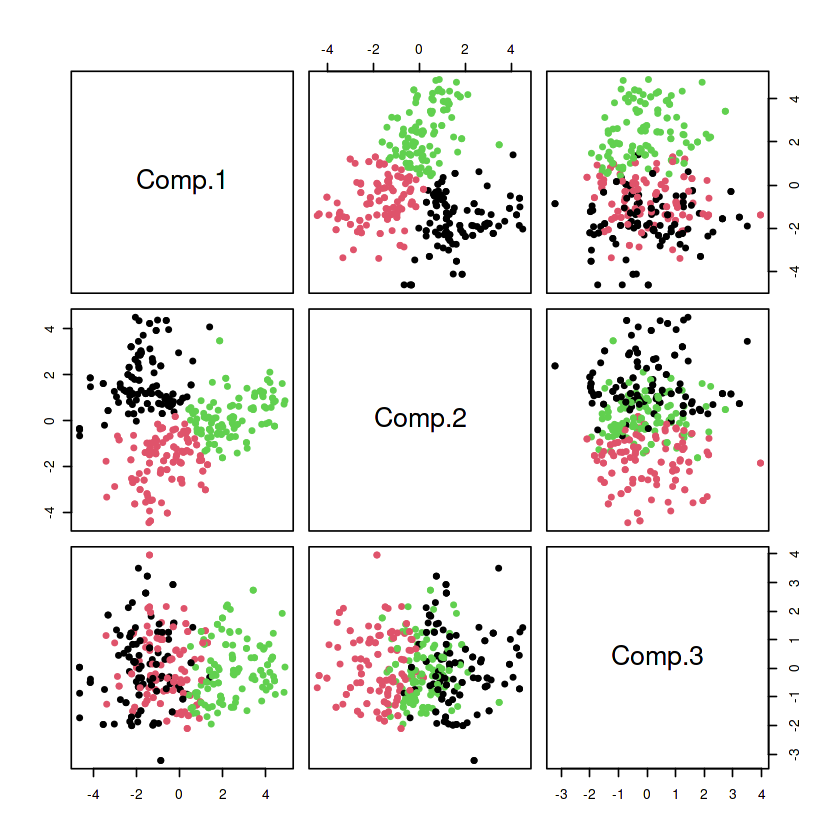

In [24]:
pairs(komuter_pca,col=c(1:3)[kmRes$cluster],pch=16)

Untuk menjadikan klaster yang baik dan dapat diinterpretasikan, varians within cluster harus sehomogen mungkin dan varians between cluster harus seheterogen mungkin. Pada visualisasi klaster tersebut, antar titik observasi pada suatu klaster terlihat berdekatan dan menggerombol. Artinya varians within cluster sudah cukup homogen. Sementara itu, antar titik-titik observasi antar klaster terlihat berjauhan. Artinya varians between cluster sudah cukup heterogen. Maka dari itu, analisis dapat dilanjutkan dengan cluster profilling serta interpretasi antar klaster.

#### Profilling Klaster
Cluster profilling adalah salah satu cara untuk menginterpretasikan hasil/output akhir pengklasteran. Caranya adalah dengan melihat mengidentifikasi rata-rata atau centroid dari setiap atribut di dalam suatu klaster dan dibandingkan dengan centroid pada klaster lainnya. Cluster profilling disajikan pada tabel sebagai berikut:

In [25]:
cluster_mean <- aggregate(komuter,list(kmRes$cluster),mean)
cluster_mean

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


Group.1,No..Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,⋯,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan.Hidup
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,221.7724,1.203252,39.14634,1.195122,3.601626,1.016260,2.918699,4.300813,4.333333,⋯,3.983740,3.235772,2.569106,2.487805,2.552846,2.601626,2.699187,2.780488,2.902439,NA
2,204.6691,1.213235,34.67647,1.419118,2.948529,1.147059,3.919118,3.573529,3.588235,⋯,3.382353,3.397059,3.198529,3.227941,3.176471,3.154412,3.250000,3.330882,3.323529,NA
3,150.4560,1.360000,31.78400,1.320000,3.296000,1.080000,3.680000,4.032000,4.224000,⋯,4.096000,3.904000,3.936000,3.952000,3.968000,3.880000,3.888000,3.920000,3.928000,NA


Pada tabel tersebut, warna hijau menunjukkan nilai tinggi, warna kuning menunjukkan nilai sedang, dan warna merah menunjukkan nilai rendah pada suatu atribut dengan membandingkan atribut pada klaster lainnya. Pengecualian untuk atribut F.1 s.d. F.8 yang merupakan bagian dari dimensi kualitas hidup, oleh karena pertanyaan variabel bersifat negatif, maka warna hijau menunjukkan nilai rendah (memiliki kualitas hidup tinggi), serta sebaliknya warna merah menunjukkan nilai tinggi (memiliki kualitas hidup rendah). Interpretasi pada setiap klaster yang terbentuk adalah sebagai berikut:

1. **Klaster 1** menunjukkan dimensi perumahan (B.1 dam B.2) yang tinggi (biaya perumahan tinggi dan rumah yang layak), dimensi rasio ketergantungan dalam keluarga (C.4) yang sedang, dimensi pendapatan (D.1, D.2, D.3, dan D.4) yang tinggi, layak, dan sebanding, dimensi keterjangkauan terhadap kota tujuan yang mudah, nyaman, dan sebanding, serta dimensi kualitas hidup yang tinggi (F.1 s.d. F.8). Dilihat dari indikator-indikator penyusunnya, komuter yang dikelompokkan ke dalam Klaster 1 merupakan komuter yang memiliki kualitas hidup yang sangat layak.
2.**Klaster 2** menunjukkan dimensi perumahan (B.1 dam B.2) yang rendah (biaya perumahan rendah dan rumah yang tidak layak), dimensi rasio ketergantungan dalam keluarga (C.4) yang tinggi (sedikit anggota keluarga yang bekerja), dimensi pendapatan (D.1, D.2, D.3, dan D.4) yang sedang, tidak layak, dan tidak sebanding, dimensi keterjangkauan terhadap kota tujuan yang sulit, tidak nyaman, dan tidak sebanding, serta dimensi kualitas hidup yang rendah (F.1 s.d. F.8). Dilihat dari indikator-indikator penyusunnya, komuter yang dikelompokkan ke dalam Klaster 2 merupakan komuter yang memiliki kualitas hidup yang tidak layak.
3. **Klaster 3** menunjukkan dimensi perumahan (B.1 dam B.2) yang sedang (biaya perumahan sedang dan rumah yang cukup layak), dimensi rasio ketergantungan dalam keluarga (C.4) yang rendah (banyak anggota keluarga yang bekerja), dimensi pendapatan (D.1, D.2, D.3, dan D.4) yang rendah namun layak, dan sebanding, dimensi keterjangkauan terhadap kota tujuan yang mudah, nyaman, dan sebanding, serta dimensi kualitas hidup yang sedang (F.1 s.d. F.8). Dilihat dari indikator-indikator penyusunnya, komuter yang dikelompokkan ke dalam Klaster 3 merupakan komuter yang memiliki kualitas hidup yang cukup layak.

### Demografi Komuter
Dari hasil klasterisasi tersebut, peneliti juga melihat karakteristik sosial demografi komuter dalam ketiga klaster tersebut. Setiap klaster tersebut memiliki kecenderungan memiliki karakteristik sosial demografi tertentu. Perbandingan antar klaster tersebut dapat dilihat pada visualisasi beberapa diagram batang dan boxplot berikut.

In [27]:
#load data
komuter <- cbind(komuter,kmRes$cluster)

#### vs Gender

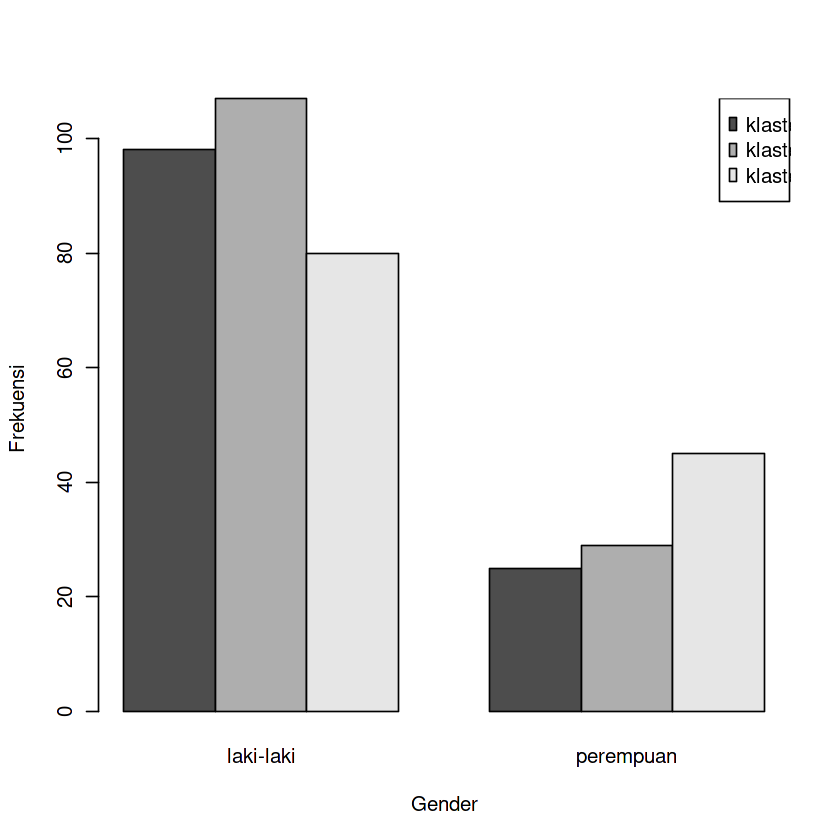

In [28]:
tab <- table(komuter[,c(2,31)])
tab <- cbind(tab[,1],tab[,2],tab[,3])
colnames(tab) <- c("1","2","3")
rownames(tab) <- c("laki-laki","perempuan")
barplot(t(tab),beside=TRUE,xlab="Gender",ylab="Frekuensi",col=gray.colors(3))
legend("topright",c("klaster 1","klaster 2","klaster 3"),fill=gray.colors(3))

Pada karakteristik sosial demografi jenis kelamin (gender), laki-laki cenderung tergolong pada klaster 2 (kualitas hidup tidak layak) sedangkan perempuan cenderung terkelompok pada klaster 3 (kualitas hidup cukup layak).

#### vs Usia

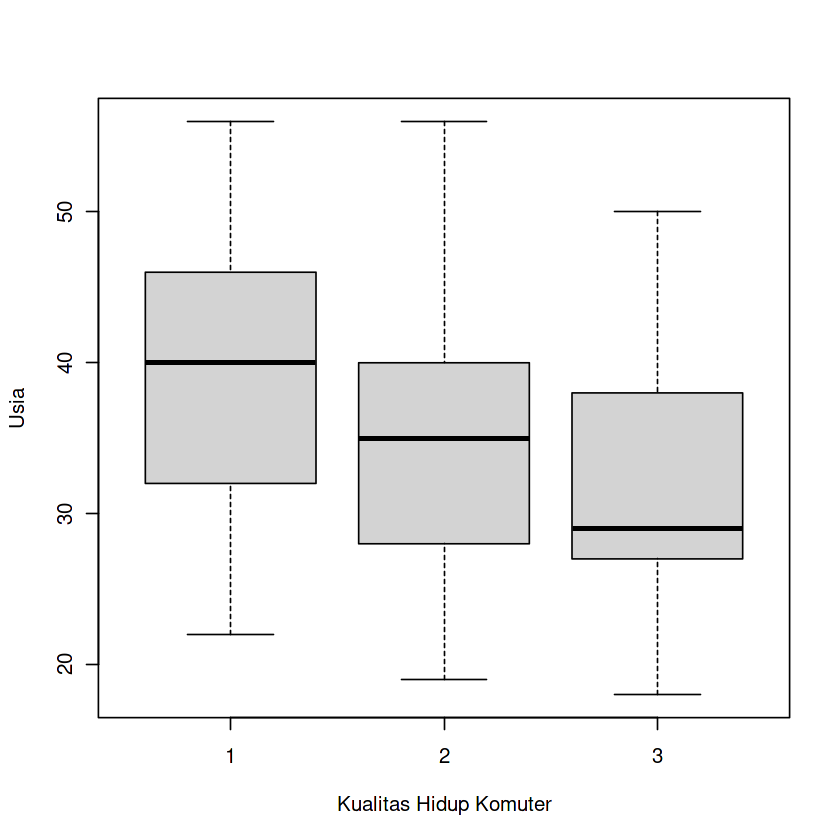

In [29]:
plot(as.factor(komuter[,31]),komuter[,3],xlab="Kualitas Hidup Komuter",ylab="Usia")

Pada karakteristik usia, komuter dengan usia yang tinggi cenderung tergolong pada klaster 1 (kualitas hidup sangat layak). Komuter dengan usia yang tinggi cenderung tergolong pada klaster 1 (kualitas hidup sangat layak), sedangkan klaster 2 dan 3 cenderung memiliki karakteristik usia yang lebih muda.

#### vs Status Perkawinan

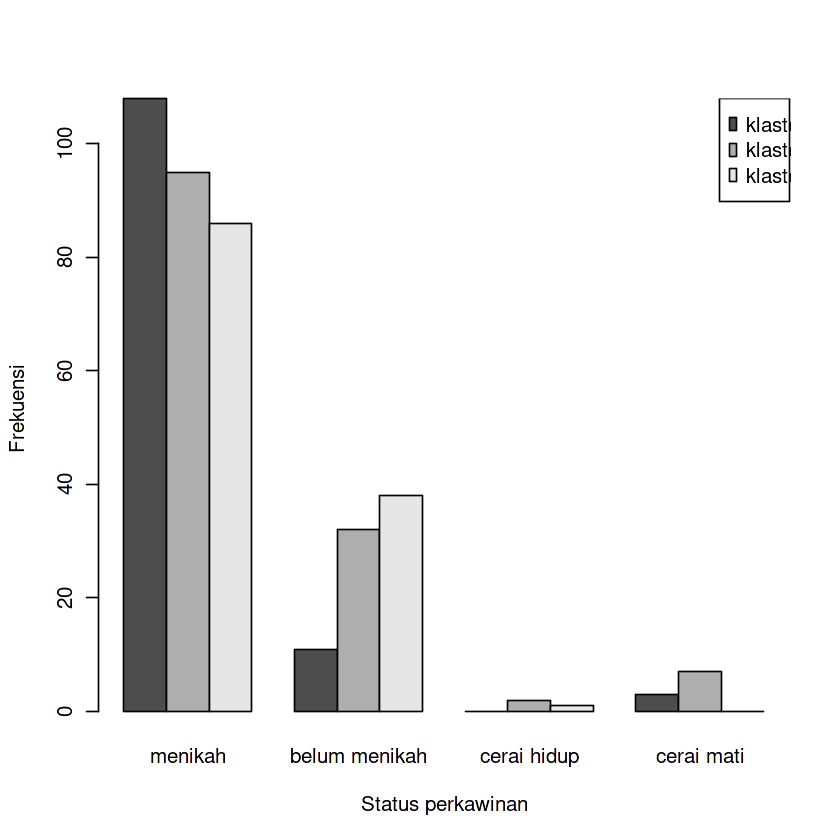

In [30]:
tab <- table(komuter[,c(4,31)])
tab <- cbind(tab[,1],tab[,2],tab[,3])
tab <- tab[-5,]
colnames(tab) <- c("1","2","3")
rownames(tab) <- c("menikah","belum menikah","cerai hidup","cerai mati")
barplot(t(tab),beside=TRUE,xlab="Status perkawinan",ylab="Frekuensi",col=gray.colors(3))
legend("topright",c("klaster 1","klaster 2","klaster 3"),fill=gray.colors(3))

Seseorang yang telah menikah cenderung tergolong pada klaster 1 (sangat layak), sedangkan seseorang yang belum menikah cenderung tergolong pada kualitas hidup cukup layak dan tidak layak (klaster 2 dan 3).

#### vs Pendidikan Terakhir

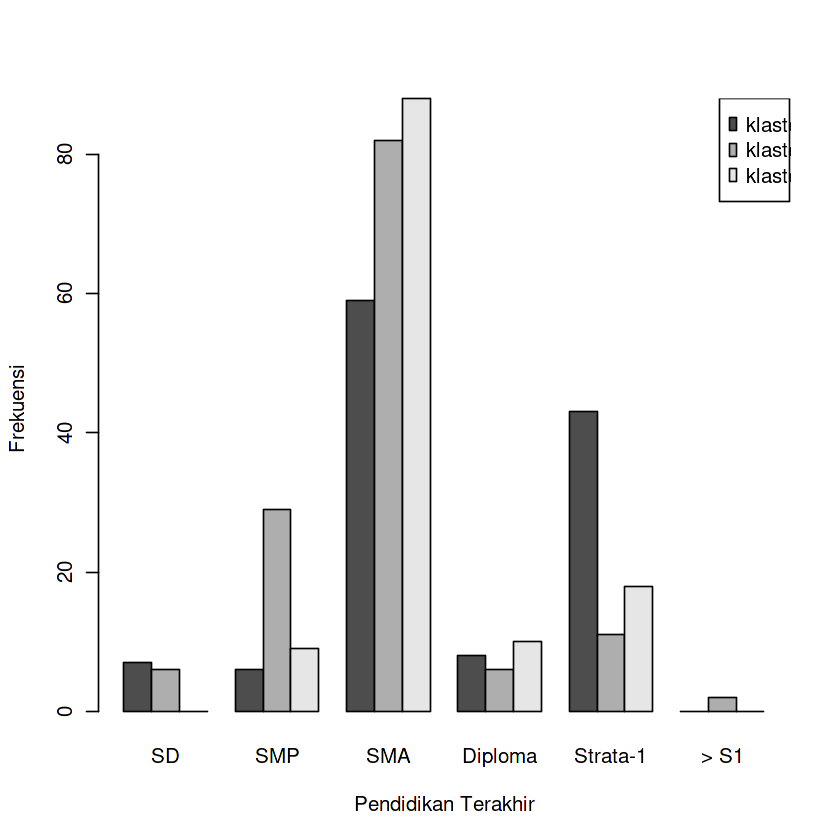

In [31]:
tab <- table(komuter[,c(5,31)])
tab <- cbind(tab[,1],tab[,2],tab[,3])
colnames(tab) <- c("1","2","3")
rownames(tab) <- c("SD","SMP","SMA","Diploma","Strata-1","> S1")
barplot(t(tab),beside=TRUE,xlab="Pendidikan Terakhir",ylab="Frekuensi",col=gray.colors(3))
legend("topright",c("klaster 1","klaster 2","klaster 3"),fill=gray.colors(3))

Pada karakteristik pendidikan terakhir, komuter dengan gelar sarjana cenderung memiliki kualitas hidup sangat layak (klaster 1), sedangkan jenjang pendidikan lain yang lebih rendah (SD, SMP, SMA, Diploma) cenderung memiliki kualitas hidup tidak layak (klaster 2) dan cukup layak (klaster 3).

#### vs Agama

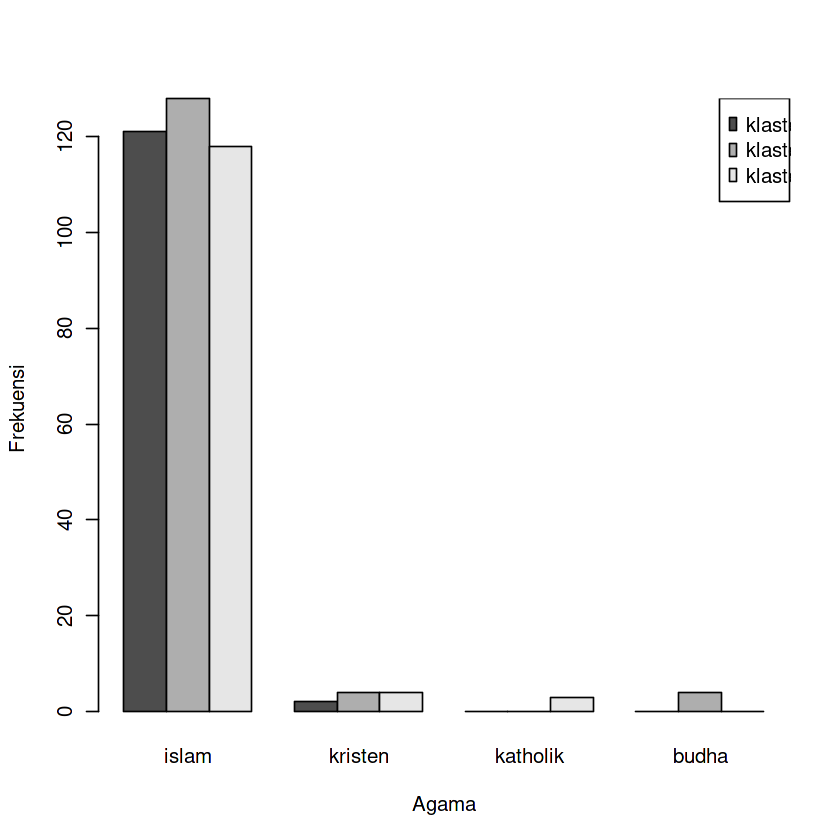

In [32]:
tab <- table(komuter[,c(6,31)])
tab <- cbind(tab[,1],tab[,2],tab[,3])
colnames(tab) <- c("1","2","3")
rownames(tab) <- c("islam","kristen","katholik","budha")
barplot(t(tab),beside=TRUE,xlab="Agama",ylab="Frekuensi",col=gray.colors(3))
legend("topright",c("klaster 1","klaster 2","klaster 3"),fill=gray.colors(3))

Sulit diinterpretasikan karena responden sebagian besar hanya terdistribusi pada agama Islam saja. Selain itu, agama yang dianut juga tidak logis jika dihubungkan dengan kualitas hidup pekerja komuter.

#### vs Pekerjaan

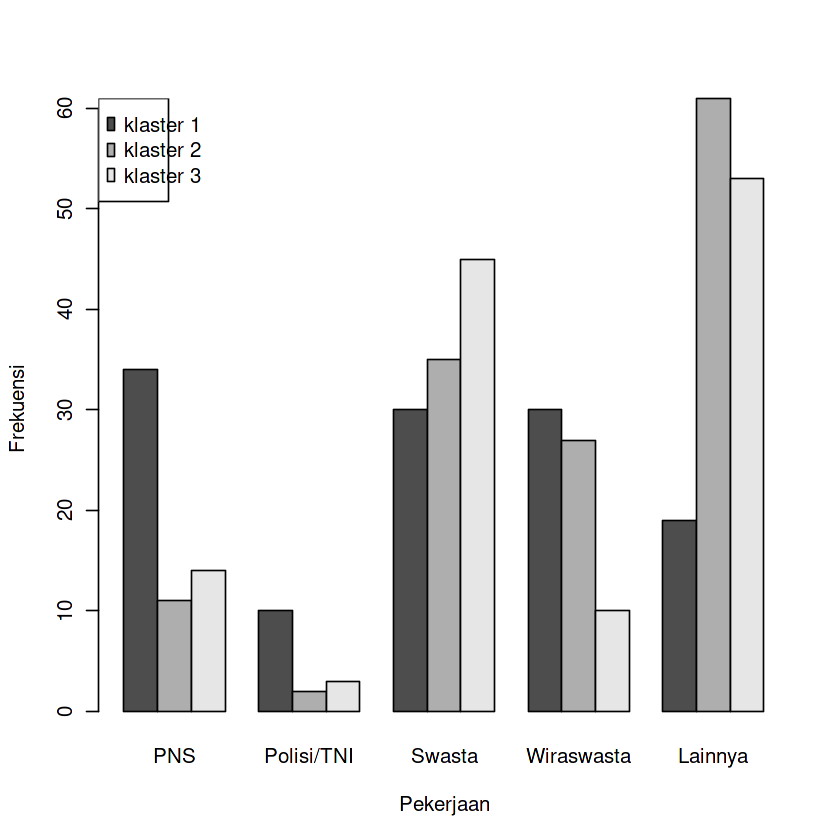

In [33]:
tab <- table(komuter[,c(7,31)])
tab <- cbind(tab[,1],tab[,2],tab[,3])
colnames(tab) <- c("1","2","3")
rownames(tab) <- c("PNS","Polisi/TNI","Swasta","Wiraswasta","Lainnya")
barplot(t(tab),beside=TRUE,xlab="Pekerjaan",ylab="Frekuensi",col=gray.colors(3))
legend("topleft",c("klaster 1","klaster 2","klaster 3"),fill=gray.colors(3))

Pekerja komuter yang berprofesi sebagai PNS, Polisi/TNI, dan wiraswasta cenderung memiliki kualitas hidup layak (klaster 1) sedangkan pekerja komuter bidang swasta dan lainnya cenderung memiliki kualitas hiudp tidak layak (klaster 2) dan cukup layak (klaster 3).

## Kesimpulan
Berdasarkan hasil dan pembahasan yang telah diuraikan, dari penelitian ini dapat disimpulkan antara lain: (1) klaster optimum yang terbentuk dengan metode K-Means Clustering adalah sebanyak tiga (3) klaster. Melalui cluster profilling, ketiga klaster tersebut dapat diidentifikasi sebagai klaster komuter dengan kualitas hidup sangat layak (klaster 1), klaster komuter dengan kualitas hidup tidak layak (klaster 2), dan klaster dengan kualitas hidup sedang/cukup layak (klaster 3). Antar klaster tersebut juga memiliki kecenderungan karakteristik sosial demografi yang berbeda.

## Daftar Pustaka
* BPS. 2019. Statistik Komuter Jabodetabek: Hasil Survei Komuter Jabodetabek 2019. Badan Pusat Statistik. https://www.bps.go.id/publication/2019/12/04/eab87d14d99459f4016bb057/statistik-komuter-jabodetabek-2019.html.
* Cahyani, A. H., Akhyar, M., Niandhini, H., Alfira, S., Ananda, N., & Seulanga, N. 2018. Meski Lama Di Kereta, Kamu Masih Bisa Bahagia. Jurnal Ilmiah Psikologi MIND SET. https://doi.org/10.35814/MINDSET.V9I02.733.
* Kusmawan, D., & Susilowati, I. H. 2020. Studi Kualitas Hidup Pekerja Komuter Pengguna KRL Commuter Line Dan Busway Transjakarta Dari Bogor Ke Jakarta. JAMBI MEDICAL JOURNAL “Jurnal Kedokteran Dan Kesehatan,” 8(2). https://doi.org/10.22437/JMJ.V8I2.10429.
* Pramana, S., Yuniarto, B., Mariyah, S., Santoso, I., & Nooraeni, R. 2020. Data Mining Dengan r: Konsep Dan Implementasi. In Media.
* Rahmadana, M. F. 2014. Karakteristik Komuter Dan Kualitas Hidup. Ekonomikawan: Jurnal Ilmu Ekonomi Dan Studi Pembangunan, 14(1). http://jurnal.umsu.ac.id/index.php/ekawan/article/download/179/pdf_3.